In [35]:
import pandas as pd
import numpy as np
# Load dataset
df = pd.read_csv('/content/LabReport02-knn/IRIS.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Confusion Matrix for Best Model

In [36]:
#Handle Missing Values

df.isnull().sum()

for col in df.columns[:-1]:  # exclude target column
    df[col].fillna(df[col].mean(), inplace=True)
#Feature & Target Separation
    X = df.drop('species', axis=1)
y = df['species']
#Min–Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


/tmp/ipython-input-2491365902.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2491365902.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
split_ratios = [0.5, 0.4, 0.3, 0.2]   # test sizes
k_values = [1, 3, 5, 7, 9]

results = []


Train & Evaluate Model

In [38]:
for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42
    )

    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro')
        rec = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        results.append({
            'Test Split': f"{int((1-test_size)*100)}:{int(test_size*100)}",
            'K': k,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-score': f1
        })



In [39]:
results_df = pd.DataFrame(results)
results_df



,Test Split,K,Accuracy,Precision,Recall,F1-score
0,50:50,1,0.986667,0.986111,0.985507,0.985500
1,50:50,3,0.986667,0.986111,0.985507,0.985500
2,50:50,5,0.986667,0.986111,0.985507,0.985500
3,50:50,7,0.986667,0.986111,0.985507,0.985500
4,50:50,9,0.973333,0.973333,0.971014,0.970960
5,60:40,1,0.983333,0.983333,0.981481,0.981929
6,60:40,3,0.983333,0.983333,0.981481,0.981929
7,60:40,5,0.983333,0.983333,0.981481,0.981929
8,60:40,7,0.983333,0.983333,0.981481,0.981929
9,60:40,9,0.983333,0.983333,0.981481,0.981929


In [40]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
best_model


,10
Test Split,70:30
K,1
Accuracy,1.0
Precision,1.0
Recall,1.0
F1-score,1.0


In [41]:
best_k = best_model['K']
best_split = best_model['Test Split']

test_size = int(best_split.split(':')[1]) / 100

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=test_size, random_state=42
)

best_knn = KNeighborsClassifier(n_neighbors=int(best_k))
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

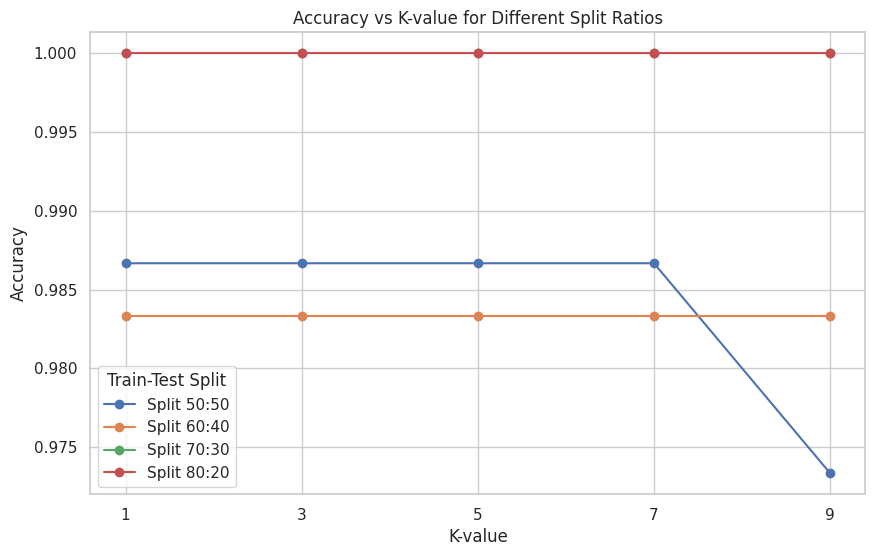

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


results_df['Test Split'] = results_df['Test Split'].astype(str)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for test_size in results_df['Test Split'].unique():
    subset = results_df[results_df['Test Split'] == test_size]
    plt.plot(subset['K'], subset['Accuracy'], marker='o', label=f'Split {test_size}')

plt.title('Accuracy vs K-value for Different Split Ratios')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend(title='Train-Test Split')
plt.grid(True)
plt.show()
